In [1]:
from autograd import grad
import matplotlib.pyplot as plt

In [2]:
def gradient_descent(alpha, max_its, w):
    
    g = lambda w: 1/50*(w**4+w**2+10*w)
    g_deriv = lambda w: 1/50*(4*w**3+2*w+10)
    
    cost_history = [g(w)]
    
    for k in range(0,max_its):
        
        grad_eval = g_deriv(w)
        w=w-alpha*grad_eval
        cost_history.append(g(w))
        
    return cost_history

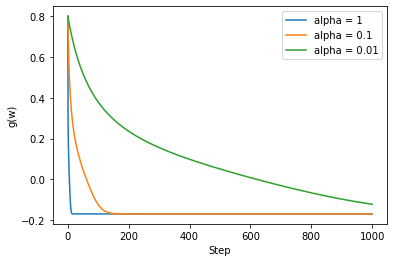

In [3]:
w=2.0
max_its=1000
i=list(range(0,max_its+1))

alpha=10**(0)
cost_history_1=gradient_descent(alpha,max_its,w)

alpha=10**(-1)
cost_history_2=gradient_descent(alpha,max_its,w)

alpha = 10**(-2)
cost_history_3 = gradient_descent(alpha,max_its,w)

plt.figure()
plt.plot(i, cost_history_1,label = "alpha = 1")
plt.plot(i, cost_history_2,label = "alpha = 0.1")
plt.plot(i, cost_history_3,label = "alpha = 0.01")
plt.xlabel('Step')
plt.ylabel('g(w)')
plt.legend()
plt.show()

In [4]:
from autograd import grad
from autograd import numpy as np
import matplotlib.pyplot as plt

In [5]:
def gradient_descent(g,alpha,max_its,w):
    
    gradient=grad(g)
    weight_history=[w]
    cost_history=[g(w)]
    
    for k in range(0,max_its):
        
        grad_eval=gradient(w)
        w=w-alpha*grad_eval
        weight_history.append(w)
        cost_history.append(g(w))
        
    return weight_history,cost_history

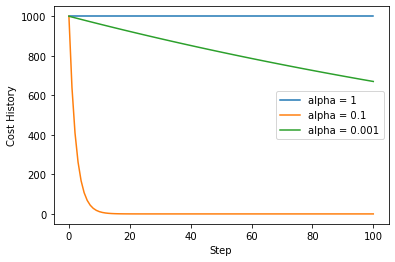

In [6]:
g=lambda w:np.dot(w.T,w)[0][0]

max_its=100;
w=10*np.ones((10,1));
i=list(range(0,max_its+1))


alpha_choice=10**(0);
weight_history_1,cost_history_1=gradient_descent(g,alpha_choice,max_its,w)

alpha_choice=10**(-1);
weigth_history_2,cost_history_2=gradient_descent(g,alpha_choice,max_its,w)

alpha_choice=10**(-3);
weight_history_3,cost_history_3=gradient_descent(g,alpha_choice,max_its,w)

plt.figure()
plt.plot(i, cost_history_1,label = "alpha = 1")
plt.plot(i, cost_history_2,label = "alpha = 0.1")
plt.plot(i, cost_history_3,label = "alpha = 0.001")
plt.xlabel('Step')
plt.ylabel('Cost History')
plt.legend()
plt.show()

In [7]:
from autograd import numpy as np
from autograd import value_and_grad
from mlrefined_libraries import math_optimization_library as optlib
static_plotter = optlib.static_plotter.Visualizer();
anime_plotter = optlib.animation_plotter.Visualizer();

In [8]:
def momentum(g,alpha,beta,max_its,w):
    
    gradient = value_and_grad(g)
    weight_history = []
    cost_history = []
    
    cost_eval,grad_eval=gradient(w)
    h=np.zeros((w.shape))
    
    for k in range(1,max_its+1):

        cost_eval,grad_eval=gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        h=beta*h-(1-beta)*grad_eval
        w=w+alpha*h
        weight_history.append(w)
        cost_history.append(g(w))
        
    return weight_history,cost_history

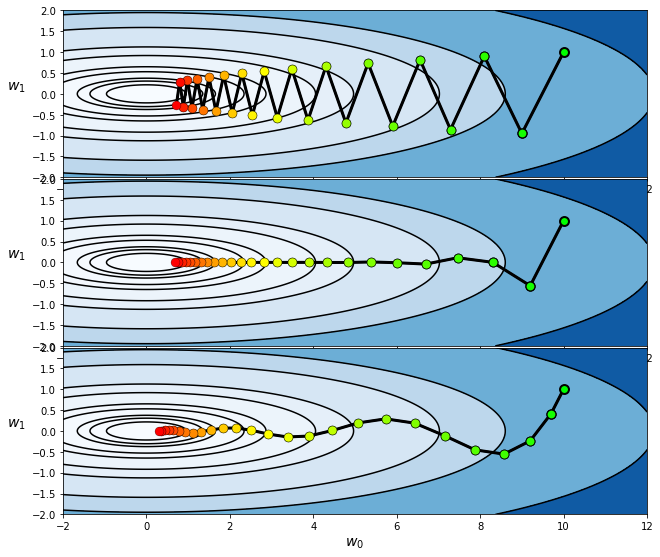

In [9]:
a = 0
b = np.zeros((2,1))
c = np.array([[0.5,0],[0,9.75]])
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,c),w))[0]

w = np.array([10.0,1.0])
max_its = 25
alpha= 10**(-1)

beta = 0
weight_history_1,cost_history_1 = momentum(g,alpha,beta,max_its,w)

beta = 0.2;
weight_history_2,cost_history_2 = momentum(g,alpha,beta,max_its,w)

beta = 0.7
weight_history_3,cost_history_3 = momentum(g,alpha,beta,max_its,w)

histories = [weight_history_1,weight_history_2,weight_history_3]
gs=[g,g,g]

static_plotter.two_input_contour_vert_plots(gs,histories,num_contours = 25,xmin =-2.0,xmax = 12.0,ymin = -2.0,ymax = 2.0)

In [10]:
from autograd import numpy as np
from autograd import value_and_grad

In [11]:
def gradient_descent(g,alpha,max_its,w,version):
    
    gradient=value_and_grad(g)
    weight_history=[]
    cost_history=[]
    
    
    for k in range(max_its):
        
        cost_eval,grad_eval=gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        
        if version =='Fully':
            grad_norm = np.linalg.norm(grad_eval)
            
            if grad_norm==0:
                grad_norm = grad_norm + 10**-6*np.sign(2*np.random.rand(1)-1)
                
            grad_eval = grad_eval/grad_norm
            
        if version=='Standard':
            grad_eval=grad_eval
            
        w = w - alpha * grad_eval
        
    weight_history.append(w)
    cost_history.append(g(w))
        
    return weight_history,cost_history

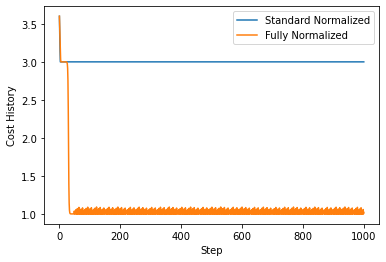

In [12]:
g = lambda w: np.tanh(4*w[0] + 4*w[1]) + max(0.4*w[0]**2,1) + 1
w = np.array([2.0,2.0])
max_its = 1000
alpha = 10**(-1)
i=list(range(0,max_its+1))

version = 'Standard'
weight_history_1,cost_history_1 = gradient_descent(g,alpha,max_its,w,version)

version = 'Fully'
weight_history_2,cost_history_2 = gradient_descent(g,alpha,max_its,w,version)

plt.figure()
plt.plot(i, cost_history_1,label = "Standard Normalized")
plt.plot(i, cost_history_2,label = "Fully Normalized")
plt.xlabel('Step')
plt.ylabel('Cost History')
plt.legend()
plt.show()

In [13]:
from autograd import numpy as np
from autograd import value_and_grad

In [14]:
def gradient_descent(g,alpha,max_its,w,version):
    
    gradient=value_and_grad(g)
    weight_history=[]
    cost_history=[]
    
    
    for k in range(max_its):
        
        cost_eval,grad_eval=gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        
        if version =='Fully':
            grad_norm = np.linalg.norm(grad_eval)
            
            if grad_norm==0:
                grad_norm = grad_norm + 10**-6*np.sign(2*np.random.rand(1)-1)
                
            grad_eval = grad_eval/grad_norm
            
        if version=='Component_Wise':
            component_norm=np.abs(grad_eval)+10**(-8)
            grad_eval=grad_eval/component_norm
            
        w = w - alpha * grad_eval
        
    weight_history.append(w)
    cost_history.append(g(w))
        
    return weight_history,cost_history

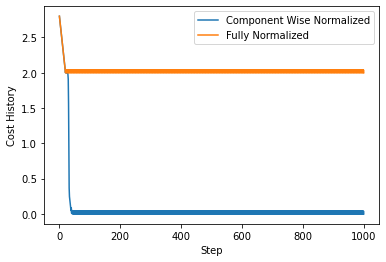

In [15]:
g = lambda w: np.max(np.tanh(4*w[0] + 4*w[1]),0) + np.abs(0.4*w[0]) + 1
w = np.array([2.0,2.0])
max_its = 1000
alpha = 10**(-1)
i=list(range(0,max_its+1))

version = 'Component_Wise'
weight_history_1,cost_history_1 = gradient_descent(g,alpha,max_its,w,version)

version = 'Fully'
weight_history_2,cost_history_2 = gradient_descent(g,alpha,max_its,w,version)

plt.figure()
plt.plot(i, cost_history_1,label = "Component Wise Normalized")
plt.plot(i, cost_history_2,label = "Fully Normalized")
plt.xlabel('Step')
plt.ylabel('Cost History')
plt.legend()
plt.show()